In [1]:
import COS_Funcs.utils.visualize as V
import COS_Funcs.baseline as baseline
import COS_Funcs.cos.optimize as optimize

from COS_Funcs.utils import *
from COS_Funcs.cos import cos

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os 
from sklearn.datasets import make_blobs

ModuleNotFoundError: No module named 'COS_Funcs'

In [49]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [96]:
from AROS import AROS
from baseline.baseline import *

In [97]:
X_train,X_test,y_train,y_test = read_fold('Datasets\\sampledata1.csv',3)
# AROS(X_train,y_train,N=22,linkage='ward',all_safe_weight=88)

In [104]:
ar = AROS(33)
ar.fit_sample(X_train,y_train)

(array([[0.0505079654113298, -0.5620469495001773],
        [-0.6299621761563389, 0.2383393236193566],
        [1.1500481331883556, 0.4103849711123405],
        ...,
        [0.007093072579006593, 0.406716037019884],
        [0.6343101830038536, 0.2608238576349503],
        [0.15651627739490578, -0.6886016695923833]], dtype=object),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

## How to use COS

smote


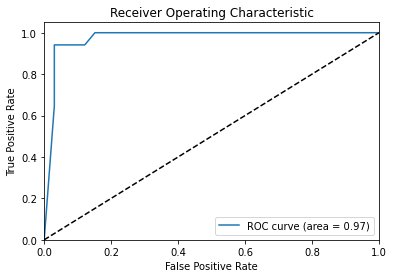

cos


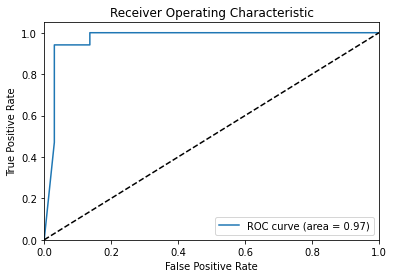

In [120]:
# For visualization and showing the safe area, here use a fake dataset
# for dataset in baseline.datasets:
dataset = baseline.datasets[44]
X_train,X_test,y_train,y_test = read_fold(dataset,3)
# V.show_2d_scatter(X_train,y_train)

L_best = baseline.linkages[os.path.basename(dataset)]
N = optimize.choose_N(X_train,y_train,L_best)
alpha = 0
X_cos,y_cos,_,_ = cos.COS(X_train,y_train,N,linkage=L_best)
y_pred_cos,y_score_cos = baseline.do_classification(X_cos,y_cos,X_test,'random_forest')

X_ans,y_ans = baseline.do_oversampling('smote', X_train, y_train)
y_pred_ans,y_score_ans = baseline.do_classification(X_ans,y_ans,X_test,'random_forest')

print('smote')
show_auc(y_test,y_score_ans)
print('cos')
show_auc(y_test,y_score_cos)

In [122]:
y_score_ans[y_test==1]

array([1.  , 0.97, 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 0.99,
       0.85, 0.97, 0.98, 1.  , 0.04, 1.  ])

In [88]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def show_auc(y_true, y_scores):
    fpr, tpr, thresholds = roc_curve(y_true, y_scores,pos_label=1)

    # 计算AUC
    roc_auc = auc(fpr, tpr)

    # 绘制ROC曲线
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')  # 绘制对角线
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

For visualization and showing the how COS detailed work, so we go step by step:

CURE(clustering and getting the representative points) --> 

safe area(Generate the safe areas aroung all the representative points) -->

oversampling(Generate new points in safe areas)

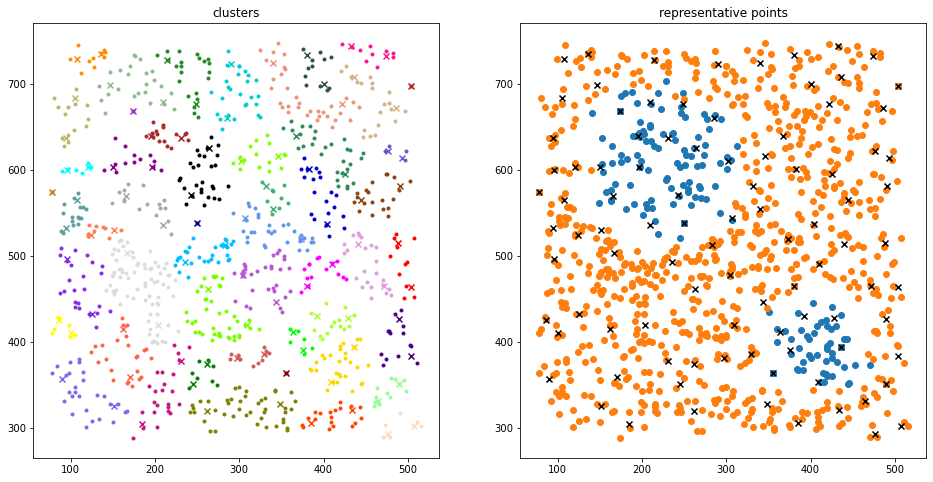

In [35]:
# Run the CURE for clustering and getting the representative points

N = 50 # number of clusters we want
c = 2 # representative points in each cluster
alpha = 0.3 # shrink rate
clusters,all_reps,num_reps = cure.Cure(X,N,c,alpha)

V.show_clusters_rep_points(X, y, clusters)

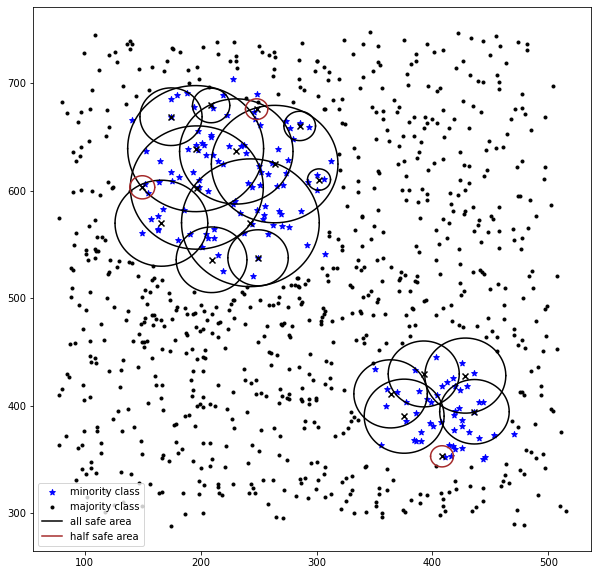

In [36]:
# Generate the safe areas aroung all the representative points(in this function it will only focus on minority class's safe area, so only return min_all_safe_area,min_half_safe_area)

areas,min_all_safe_area,min_half_safe_area = cos.safe_areas(X,all_reps,y,shrink_half=False) 
# expand_half=True: to expand half area, shrink_half=True: to shrink half area, both False, neither expand nor shrink, both True，shrink

V.show_areas(X,y,min_all_safe_area,min_half_safe_area)

IR is 1,need to generate 600 synthetic points, all safe weight is 2
There are in total 17 all safe area, 3 half safe area
So generate (2*17)/(2*17+3)=552 in all safe areas,3/(2*17+3)=48 in half safe areas
42 minority neighbors in current area, so generate 70 points around all safe area of rep point [263.83797833 624.61638328]
41 minority neighbors in current area, so generate 69 points around all safe area of rep point [242.91172463 570.02615874]
38 minority neighbors in current area, so generate 64 points around all safe area of rep point [230.76185403 636.34827308]
40 minority neighbors in current area, so generate 67 points around all safe area of rep point [195.67628317 638.99141778]
4 minority neighbors in current area, so generate 6 points around all safe area of rep point [302.11973677 610.21913891]
4 minority neighbors in current area, so generate 6 points around all safe area of rep point [249.51836315 537.43698849]
8 minority neighbors in current area, so generate 13 points a

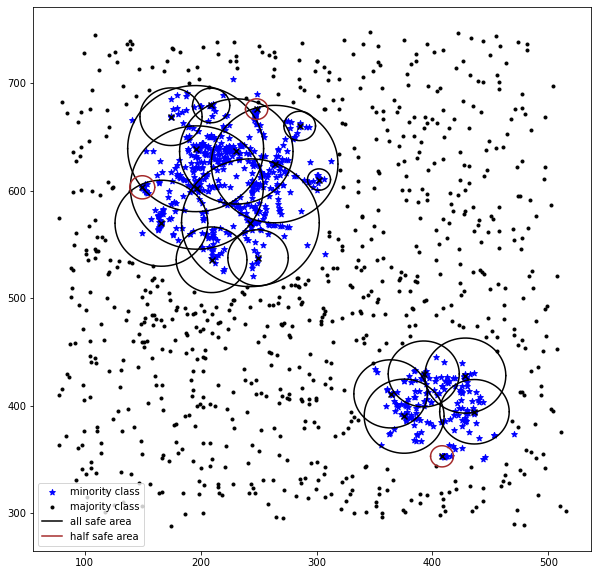

In [37]:
# Oversampling in the safe areas

X_generated,y_generated = cos.oversampling(X,y,min_all_safe_area,min_half_safe_area,minlabel=None,majlabel=None,all_safe_weight=2,show=True)
# Close the show when you don't need see the generating process

minlabel,majlabel = cos.get_labels(y)
V.show_areas(X_generated,y_generated,min_all_safe_area,min_half_safe_area,minlabel,majlabel)

We can call COS function directly to get the same oversampling dataset (not all same, because when generate new points there is a random parameter, but almost similiar)

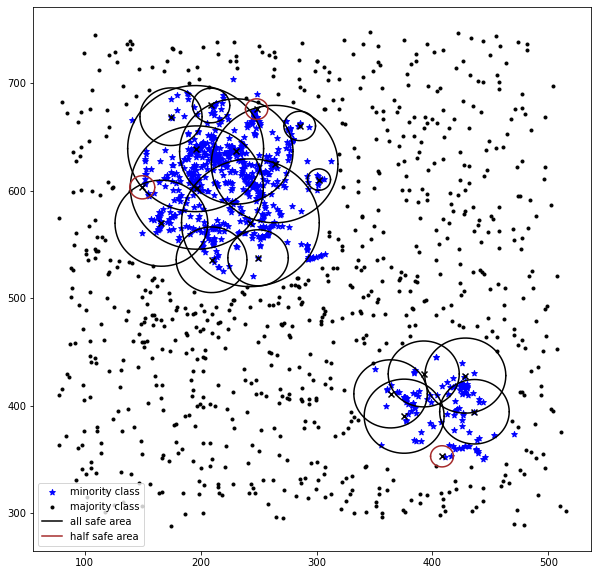

In [39]:
N = 40 # number of clusters we want
c = 3 # representative points in each cluster
alpha = 0.3 # shrink rate

X_generated,y_generated,_,_ = cos.COS(X,y,N,c,alpha,shrink_half=False,expand_half=False,
                                    all_safe_weight=2,minlabel=None,majlabel=None,visualize=False,)

minlabel,majlabel = cos.get_labels(y)
V.show_areas(X_generated,y_generated,min_all_safe_area,min_half_safe_area,minlabel,majlabel)

## To use the baseline

In [2]:
cos_paras = {'c' : 3,
             'alpha': 0.7,
             'N':40}
baseline.baseline('recall','svm',k=2,pos_label=None,excel_name=None,show_folds=False,args=cos_paras)

2022-10-24 01:35:09,376:INFO:DBSMOTE: Running sampling via ('DBSMOTE', "{'proportion': 1.0, 'eps': 0.8, 'min_samples': 3, 'db_iter_limit': 3, 'nn_params': {}, 'n_jobs': 1, 'random_state': None, 'class_name': 'DBSMOTE'}")
2022-10-24 01:35:09,383:INFO:NearestNeighborsWithMetricTensor: NN fitting with metric minkowski
2022-10-24 01:35:09,384:INFO:NearestNeighborsWithMetricTensor: kneighbors query minkowski
2022-10-24 01:35:09,673:INFO:NearestNeighborsWithMetricTensor: kneighbors query minkowski
2022-10-24 01:35:09,778:INFO:NearestNeighborsWithMetricTensor: NN fitting with metric minkowski
2022-10-24 01:35:09,780:INFO:NearestNeighborsWithMetricTensor: kneighbors query minkowski
2022-10-24 01:35:09,919:INFO:NearestNeighborsWithMetricTensor: kneighbors query minkowski
2022-10-24 01:35:10,078:INFO:SMOTE_D: Running sampling via ('SMOTE_D', "{'proportion': 1.0, 'k': 3, 'nn_params': {}, 'n_jobs': 1, 'random_state': None, 'class_name': 'SMOTE_D'}")
2022-10-24 01:35:10,079:INFO:NearestNeighborsWit

2022-10-24 01:35:30,104:INFO:NearestNeighborsWithMetricTensor: kneighbors query minkowski
2022-10-24 01:35:30,109:INFO:kmeans_SMOTE: simplex sampling with n_dim 2
2022-10-24 01:35:30,111:INFO:kmeans_SMOTE: simplex sampling with n_dim 2
2022-10-24 01:35:30,251:INFO:SOMO: Running sampling via ('SOMO', "{'proportion': 1.0, 'n_grid': 10, 'sigma': 0.2, 'learning_rate': 0.5, 'n_iter': 100, 'n_jobs': 1, 'ss_params': {'n_dim': 2, 'simplex_sampling': 'random', 'within_simplex_sampling': 'random', 'gaussian_component': {}}, 'random_state': None, 'class_name': 'SOMO'}")
2022-10-24 01:35:30,304:INFO:SOMO: simplex sampling with n_dim 2
2022-10-24 01:35:30,306:INFO:SOMO: simplex sampling with n_dim 2
2022-10-24 01:35:30,312:INFO:SOMO: simplex sampling with n_dim 2
2022-10-24 01:35:30,315:INFO:SOMO: simplex sampling with n_dim 2
2022-10-24 01:35:30,317:INFO:SOMO: simplex sampling with n_dim 2
2022-10-24 01:35:30,324:INFO:SOMO: simplex sampling with n_dim 2
2022-10-24 01:35:30,326:INFO:SOMO: simplex s

2022-10-24 01:35:53,390:INFO:SOMO: simplex sampling with n_dim 2
2022-10-24 01:35:53,455:INFO:SYMPROD: Running sampling via ('SYMPROD', "{'proportion': 1.0, 'std_outliers': 3, 'k_neighbors': 7, 'm_neighbors': 7, 'cutoff_threshold': 1.25, 'nn_params': {}, 'random_state': None, 'class_name': 'SYMPROD'}")
2022-10-24 01:35:53,462:INFO:NearestNeighborsWithMetricTensor: NN fitting with metric minkowski
2022-10-24 01:35:53,464:INFO:NearestNeighborsWithMetricTensor: kneighbors query minkowski
2022-10-24 01:35:53,631:INFO:NearestNeighborsWithMetricTensor: NN fitting with metric minkowski
2022-10-24 01:35:53,633:INFO:NearestNeighborsWithMetricTensor: kneighbors query minkowski
2022-10-24 01:35:53,769:INFO:NearestNeighborsWithMetricTensor: NN fitting with metric minkowski
2022-10-24 01:35:53,771:INFO:NearestNeighborsWithMetricTensor: kneighbors query minkowski
2022-10-24 01:35:53,777:INFO:SYMPROD: Cutoff value updated from 1.250000 to 0.875000
2022-10-24 01:35:53,778:INFO:NearestNeighborsWithMetr

2022-10-24 01:37:08,701:INFO:kmeans_SMOTE: simplex sampling with n_dim 2
2022-10-24 01:37:08,876:INFO:SOMO: Running sampling via ('SOMO', "{'proportion': 1.0, 'n_grid': 10, 'sigma': 0.2, 'learning_rate': 0.5, 'n_iter': 100, 'n_jobs': 1, 'ss_params': {'n_dim': 2, 'simplex_sampling': 'random', 'within_simplex_sampling': 'random', 'gaussian_component': {}}, 'random_state': None, 'class_name': 'SOMO'}")
2022-10-24 01:37:08,921:INFO:SOMO: simplex sampling with n_dim 2
2022-10-24 01:37:08,924:INFO:SOMO: simplex sampling with n_dim 2
2022-10-24 01:37:08,927:INFO:SOMO: simplex sampling with n_dim 2
2022-10-24 01:37:08,931:INFO:SOMO: simplex sampling with n_dim 2
2022-10-24 01:37:08,934:INFO:SOMO: simplex sampling with n_dim 2
2022-10-24 01:37:08,937:INFO:SOMO: simplex sampling with n_dim 2
2022-10-24 01:37:08,940:INFO:SOMO: simplex sampling with n_dim 2
2022-10-24 01:37:08,946:INFO:SOMO: simplex sampling with n_dim 2
2022-10-24 01:37:08,948:INFO:SOMO: simplex sampling with n_dim 2
2022-10-24 0

2022-10-24 01:37:22,877:INFO:SOMO: The simplex order was updated from 2 to 1
2022-10-24 01:37:22,879:INFO:SOMO: simplex sampling with n_dim 1
2022-10-24 01:37:22,884:INFO:SOMO: simplex sampling with n_dim 2
2022-10-24 01:37:22,887:INFO:SOMO: simplex sampling with n_dim 2
2022-10-24 01:37:22,890:INFO:SOMO: simplex sampling with n_dim 2
2022-10-24 01:37:22,892:INFO:SOMO: simplex sampling with n_dim 2
2022-10-24 01:37:22,924:INFO:SYMPROD: Running sampling via ('SYMPROD', "{'proportion': 1.0, 'std_outliers': 3, 'k_neighbors': 7, 'm_neighbors': 7, 'cutoff_threshold': 1.25, 'nn_params': {}, 'random_state': None, 'class_name': 'SYMPROD'}")
2022-10-24 01:37:22,932:INFO:NearestNeighborsWithMetricTensor: NN fitting with metric minkowski
2022-10-24 01:37:22,934:INFO:NearestNeighborsWithMetricTensor: kneighbors query minkowski
2022-10-24 01:37:23,063:INFO:NearestNeighborsWithMetricTensor: NN fitting with metric minkowski
2022-10-24 01:37:23,064:INFO:NearestNeighborsWithMetricTensor: kneighbors que

2022-10-24 01:37:31,940:INFO:CURE_SMOTE: simplex sampling with n_dim 2
2022-10-24 01:37:31,944:INFO:CURE_SMOTE: simplex sampling with n_dim 2
2022-10-24 01:37:31,947:INFO:CURE_SMOTE: simplex sampling with n_dim 2
2022-10-24 01:37:31,972:INFO:kmeans_SMOTE: Running sampling via ('kmeans_SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'nn_params': {}, 'n_clusters': 10, 'irt': 2.0, 'n_jobs': 1, 'ss_params': {'n_dim': 2, 'simplex_sampling': 'random', 'within_simplex_sampling': 'random', 'gaussian_component': {}}, 'random_state': None, 'class_name': 'kmeans_SMOTE'}")
2022-10-24 01:37:33,027:INFO:NearestNeighborsWithMetricTensor: NN fitting with metric minkowski
2022-10-24 01:37:33,029:INFO:NearestNeighborsWithMetricTensor: kneighbors query minkowski
2022-10-24 01:37:33,031:INFO:NearestNeighborsWithMetricTensor: NN fitting with metric minkowski
2022-10-24 01:37:33,034:INFO:NearestNeighborsWithMetricTensor: kneighbors query minkowski
2022-10-24 01:37:33,037:INFO:kmeans_SMOTE: simplex sampling w

2022-10-24 01:37:37,709:INFO:NearestNeighborsWithMetricTensor: NN fitting with metric minkowski
2022-10-24 01:37:37,712:INFO:NearestNeighborsWithMetricTensor: kneighbors query minkowski
2022-10-24 01:37:37,883:INFO:NearestNeighborsWithMetricTensor: NN fitting with metric minkowski
2022-10-24 01:37:37,885:INFO:NearestNeighborsWithMetricTensor: kneighbors query minkowski
2022-10-24 01:37:37,891:INFO:SYMPROD: Cutoff value updated from 1.250000 to 1.250000
2022-10-24 01:37:37,893:INFO:NearestNeighborsWithMetricTensor: NN fitting with metric minkowski
2022-10-24 01:37:37,897:INFO:NearestNeighborsWithMetricTensor: kneighbors query minkowski
2022-10-24 01:37:52,028:INFO:DBSMOTE: Running sampling via ('DBSMOTE', "{'proportion': 1.0, 'eps': 0.8, 'min_samples': 3, 'db_iter_limit': 3, 'nn_params': {}, 'n_jobs': 1, 'random_state': None, 'class_name': 'DBSMOTE'}")
2022-10-24 01:37:52,031:INFO:NearestNeighborsWithMetricTensor: NN fitting with metric minkowski
2022-10-24 01:37:52,032:INFO:NearestNeig

2022-10-24 01:38:15,952:INFO:SOMO: Running sampling via ('SOMO', "{'proportion': 1.0, 'n_grid': 10, 'sigma': 0.2, 'learning_rate': 0.5, 'n_iter': 100, 'n_jobs': 1, 'ss_params': {'n_dim': 2, 'simplex_sampling': 'random', 'within_simplex_sampling': 'random', 'gaussian_component': {}}, 'random_state': None, 'class_name': 'SOMO'}")
2022-10-24 01:38:15,986:INFO:SOMO: simplex sampling with n_dim 2
2022-10-24 01:38:15,988:INFO:SOMO: simplex sampling with n_dim 2
2022-10-24 01:38:15,990:INFO:SOMO: simplex sampling with n_dim 2
2022-10-24 01:38:15,994:INFO:SOMO: simplex sampling with n_dim 2
2022-10-24 01:38:16,003:INFO:SOMO: The simplex order was updated from 2 to 1
2022-10-24 01:38:16,004:INFO:SOMO: simplex sampling with n_dim 1
2022-10-24 01:38:16,006:INFO:SOMO: simplex sampling with n_dim 2
2022-10-24 01:38:16,010:INFO:SOMO: The simplex order was updated from 2 to 1
2022-10-24 01:38:16,015:INFO:SOMO: simplex sampling with n_dim 1
2022-10-24 01:38:16,017:INFO:SOMO: The simplex order was upda

2022-10-24 01:39:14,127:INFO:SMOTE_D: Running sampling via ('SMOTE_D', "{'proportion': 1.0, 'k': 3, 'nn_params': {}, 'n_jobs': 1, 'random_state': None, 'class_name': 'SMOTE_D'}")
2022-10-24 01:39:14,129:INFO:NearestNeighborsWithMetricTensor: NN fitting with metric minkowski
2022-10-24 01:39:14,130:INFO:NearestNeighborsWithMetricTensor: kneighbors query minkowski
2022-10-24 01:39:14,189:INFO:CURE_SMOTE: Running sampling via ('CURE_SMOTE', "{'proportion': 1.0, 'n_clusters': 5, 'noise_th': 2, 'nn_params': {}, 'n_jobs': 1, 'ss_params': {'n_dim': 2, 'simplex_sampling': 'random', 'within_simplex_sampling': 'random', 'gaussian_component': {}}, 'random_state': None, 'class_name': 'CURE_SMOTE'}")
2022-10-24 01:39:14,230:INFO:CURE_SMOTE: simplex sampling with n_dim 2
2022-10-24 01:39:14,275:INFO:kmeans_SMOTE: Running sampling via ('kmeans_SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'nn_params': {}, 'n_clusters': 10, 'irt': 2.0, 'n_jobs': 1, 'ss_params': {'n_dim': 2, 'simplex_sampling': 'rando

2022-10-24 01:39:27,670:INFO:CURE_SMOTE: simplex sampling with n_dim 2
2022-10-24 01:39:27,673:INFO:CURE_SMOTE: simplex sampling with n_dim 2
2022-10-24 01:39:27,674:INFO:CURE_SMOTE: simplex sampling with n_dim 2
2022-10-24 01:39:27,696:INFO:kmeans_SMOTE: Running sampling via ('kmeans_SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'nn_params': {}, 'n_clusters': 10, 'irt': 2.0, 'n_jobs': 1, 'ss_params': {'n_dim': 2, 'simplex_sampling': 'random', 'within_simplex_sampling': 'random', 'gaussian_component': {}}, 'random_state': None, 'class_name': 'kmeans_SMOTE'}")
2022-10-24 01:39:28,697:INFO:NearestNeighborsWithMetricTensor: NN fitting with metric minkowski
2022-10-24 01:39:28,698:INFO:NearestNeighborsWithMetricTensor: kneighbors query minkowski
2022-10-24 01:39:28,794:INFO:NearestNeighborsWithMetricTensor: NN fitting with metric minkowski
2022-10-24 01:39:28,796:INFO:NearestNeighborsWithMetricTensor: kneighbors query minkowski
2022-10-24 01:39:28,893:INFO:NearestNeighborsWithMetricTensor

2022-10-24 01:39:32,544:INFO:SOMO: The simplex order was updated from 2 to 1
2022-10-24 01:39:32,546:INFO:SOMO: simplex sampling with n_dim 1
2022-10-24 01:39:32,563:INFO:SYMPROD: Running sampling via ('SYMPROD', "{'proportion': 1.0, 'std_outliers': 3, 'k_neighbors': 7, 'm_neighbors': 7, 'cutoff_threshold': 1.25, 'nn_params': {}, 'random_state': None, 'class_name': 'SYMPROD'}")
2022-10-24 01:39:32,567:INFO:NearestNeighborsWithMetricTensor: NN fitting with metric minkowski
2022-10-24 01:39:32,568:INFO:NearestNeighborsWithMetricTensor: kneighbors query minkowski
2022-10-24 01:39:32,671:INFO:NearestNeighborsWithMetricTensor: NN fitting with metric minkowski
2022-10-24 01:39:32,672:INFO:NearestNeighborsWithMetricTensor: kneighbors query minkowski
2022-10-24 01:39:32,765:INFO:NearestNeighborsWithMetricTensor: NN fitting with metric minkowski
2022-10-24 01:39:32,767:INFO:NearestNeighborsWithMetricTensor: kneighbors query minkowski
2022-10-24 01:39:32,770:INFO:SYMPROD: Cutoff value updated fr

,original,smote,db_smote,smote_d,cure_smote,kmeans_smote,adasyn,somo,symprod,cos
Sampledata_new_1,0.90683,0.97333,0.97333,0.97333,0.98649,0.95982,0.97333,0.96017,0.94666,0.95982
Sampledata_new_2,0.98,1.0,1.0,1.0,0.99,1.0,1.0,0.99,0.98,1.0
Sampledata1,0.24,0.94,0.86,0.94,0.88,0.54,1.0,0.74,0.42,0.78
yeast,0.70732,0.84146,0.76829,0.84146,0.79268,0.7561,0.87805,0.76829,0.70732,0.79268
pima-indians-diabetes,0.58955,0.73881,0.61194,0.71642,0.68657,0.6791,0.77612,0.67164,0.57463,0.63433
haberman,0.05,0.375,0.325,0.35,0.375,0.225,0.5,0.225,0.1,0.3
ecoli2,0.88462,0.96154,0.92308,0.96154,0.92308,0.92308,0.96154,0.92308,0.92308,0.96154
glass1,0.61111,0.86111,0.77778,0.86111,0.77778,0.77778,0.91667,0.77778,0.66667,0.75


2022-10-24 09:41:38,811:INFO:DBSMOTE: Running sampling via ('DBSMOTE', "{'proportion': 1.0, 'eps': 0.8, 'min_samples': 3, 'db_iter_limit': 3, 'nn_params': {}, 'n_jobs': 1, 'random_state': None, 'class_name': 'DBSMOTE'}")
2022-10-24 09:41:38,815:INFO:NearestNeighborsWithMetricTensor: NN fitting with metric minkowski
2022-10-24 09:41:38,816:INFO:NearestNeighborsWithMetricTensor: kneighbors query minkowski
2022-10-24 09:41:39,062:INFO:NearestNeighborsWithMetricTensor: kneighbors query minkowski
2022-10-24 09:41:39,241:INFO:SMOTE_D: Running sampling via ('SMOTE_D', "{'proportion': 1.0, 'k': 3, 'nn_params': {}, 'n_jobs': 1, 'random_state': None, 'class_name': 'SMOTE_D'}")
2022-10-24 09:41:39,242:INFO:NearestNeighborsWithMetricTensor: NN fitting with metric minkowski
2022-10-24 09:41:39,244:INFO:NearestNeighborsWithMetricTensor: kneighbors query minkowski
2022-10-24 09:41:39,296:INFO:CURE_SMOTE: Running sampling via ('CURE_SMOTE', "{'proportion': 1.0, 'n_clusters': 5, 'noise_th': 2, 'nn_para

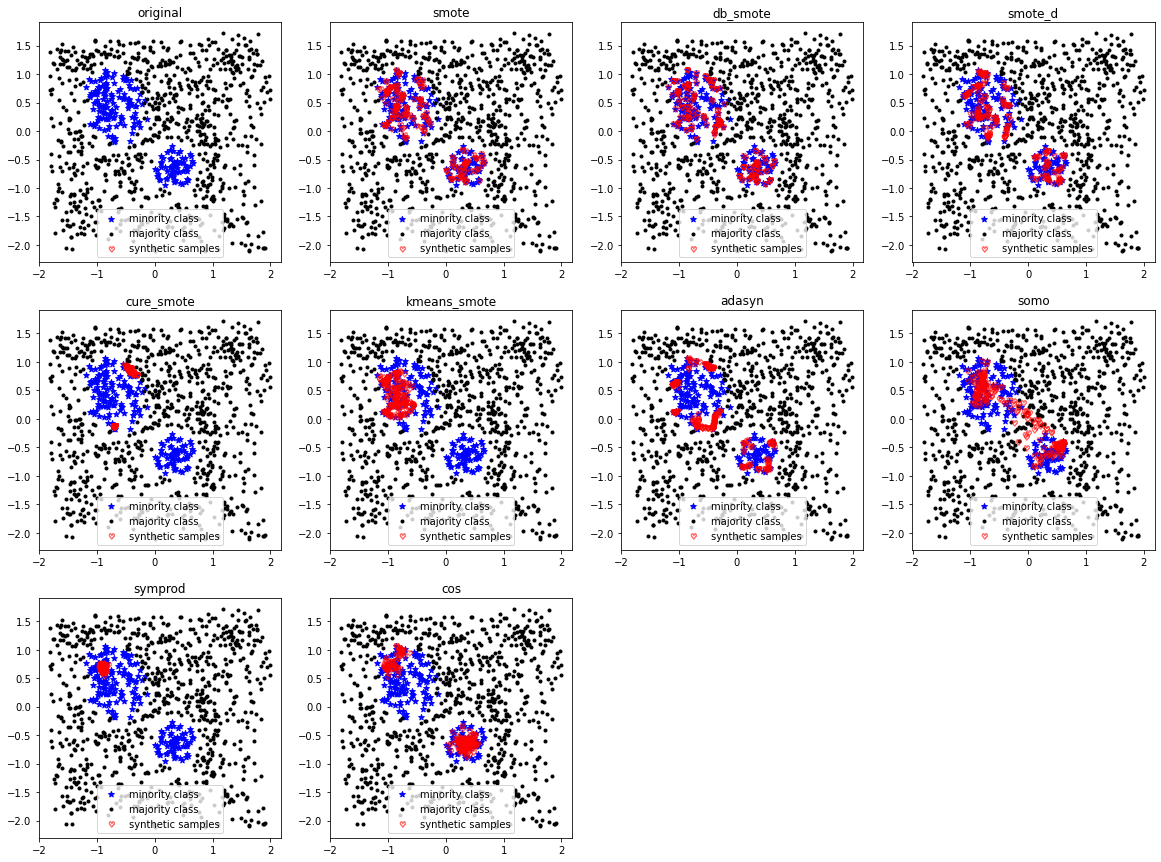

In [10]:
cos_paras = {'c' : 10,
             'alpha': 0.7,
             'N':60}
baseline.baseline_plot('Sampledata_new_2',random_state=0,args=cos_paras)

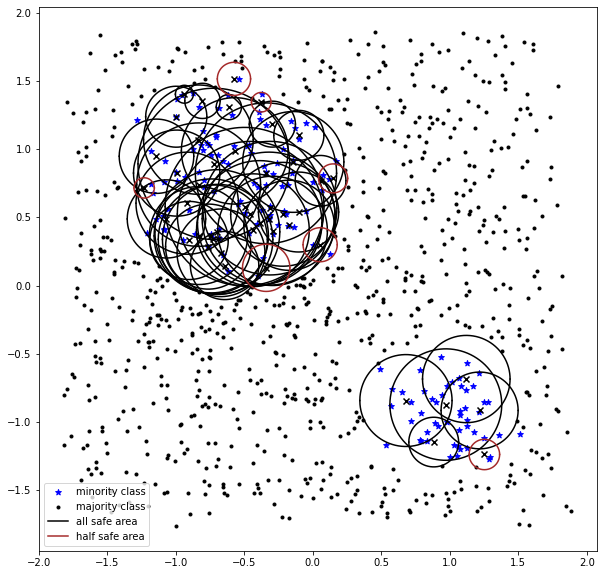

In [42]:
area,min_all_safe_area,min_half_safe_area = cos.safe_areas(X,all_reps,y,shrink_half=False) 
V.show_areas(X,y,min_all_safe_area,min_half_safe_area)

IR is 1,need to generate 600 synthetic points, all safe weight is 2
There are in total 41 all safe area, 7 half safe area
So generate (2*41)/(2*41+7)=553 in all safe areas,7/(2*41+7)=47 in half safe areas
59 minority neighbors in current area, so generate 32 points around all safe area of rep point [-0.34246177  0.82250454]
7 minority neighbors in current area, so generate 3 points around all safe area of rep point [-0.10244402  1.10049714]
29 minority neighbors in current area, so generate 16 points around all safe area of rep point [-0.1429769  0.9056693]
5 minority neighbors in current area, so generate 2 points around all safe area of rep point [-0.29590462  1.18268161]
17 minority neighbors in current area, so generate 9 points around all safe area of rep point [-0.10443017  0.53876993]
66 minority neighbors in current area, so generate 36 points around all safe area of rep point [-0.49844678  0.57863654]
27 minority neighbors in current area, so generate 14 points around all safe

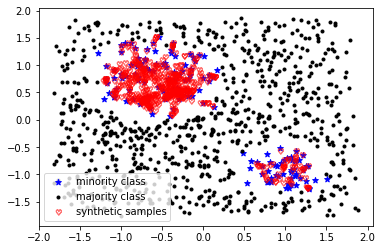

In [43]:
X_generated,y_generated = cos.oversampling(X,y,min_all_safe_area,min_half_safe_area,minlabel=None,majlabel=None,all_safe_weight=2,show=True)
minlabel,majlabel = cos.get_labels(y)
V.show_oversampling(X, y, X_generated,y_generated)

IR is 1,need to generate 600 synthetic points, all safe weight is 2
There are in total 41 all safe area, 7 half safe area
So generate (2*41)/(2*41+7)=553 in all safe areas,7/(2*41+7)=47 in half safe areas
59 minority neighbors in current area, so generate 32 points around all safe area of rep point [-0.34246177  0.82250454]
7 minority neighbors in current area, so generate 3 points around all safe area of rep point [-0.10244402  1.10049714]
29 minority neighbors in current area, so generate 16 points around all safe area of rep point [-0.1429769  0.9056693]
5 minority neighbors in current area, so generate 2 points around all safe area of rep point [-0.29590462  1.18268161]
17 minority neighbors in current area, so generate 9 points around all safe area of rep point [-0.10443017  0.53876993]
66 minority neighbors in current area, so generate 36 points around all safe area of rep point [-0.49844678  0.57863654]
27 minority neighbors in current area, so generate 14 points around all safe

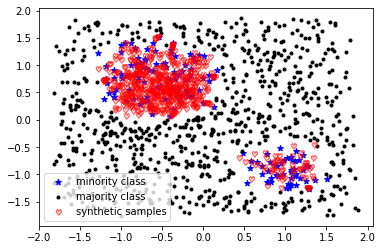

In [44]:
X_generated,y_generated = cos.oversampling(X,y,min_all_safe_area,min_half_safe_area,all_safe_gen=G.Gaussian_Generator,minlabel=None,majlabel=None,all_safe_weight=2,show=True)
minlabel,majlabel = cos.get_labels(y)
V.show_oversampling(X, y, X_generated,y_generated)

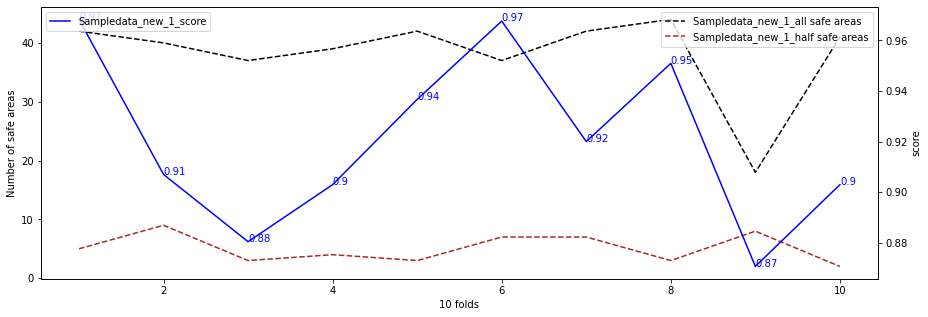

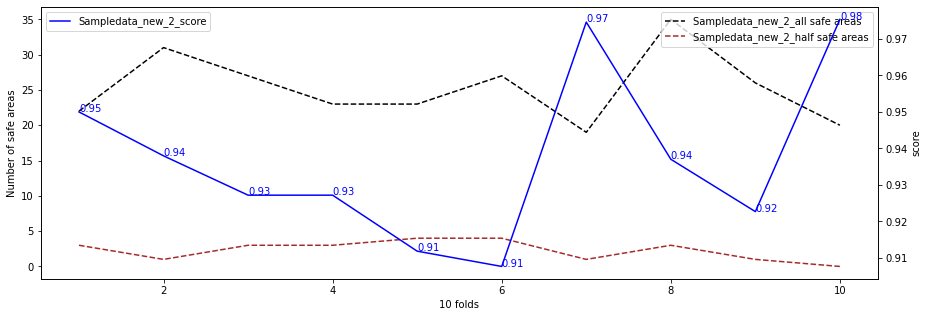

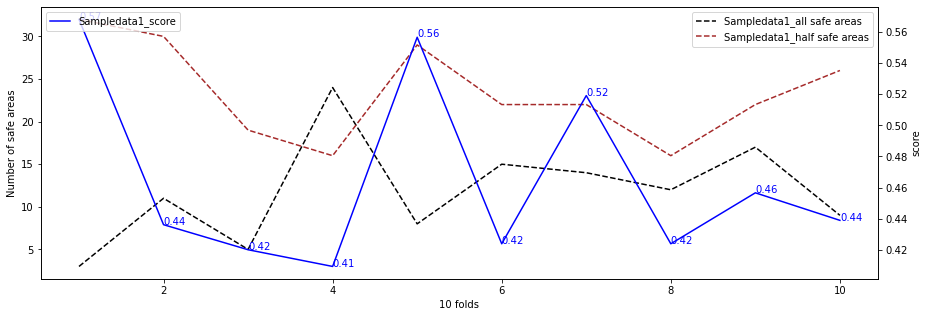

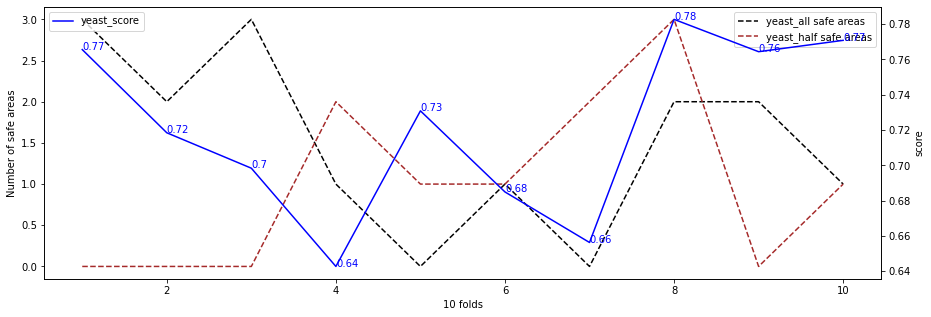

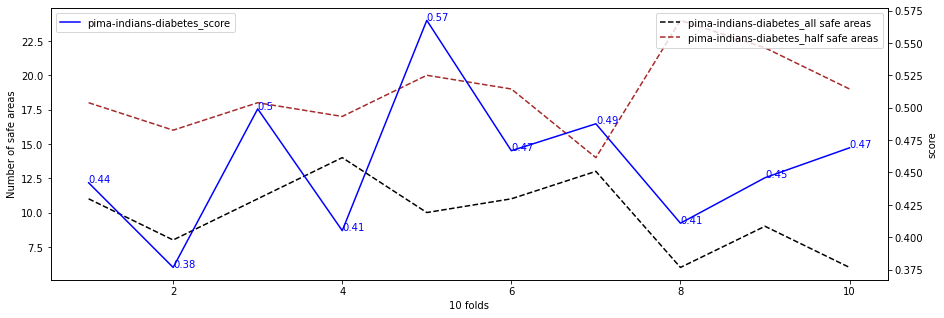

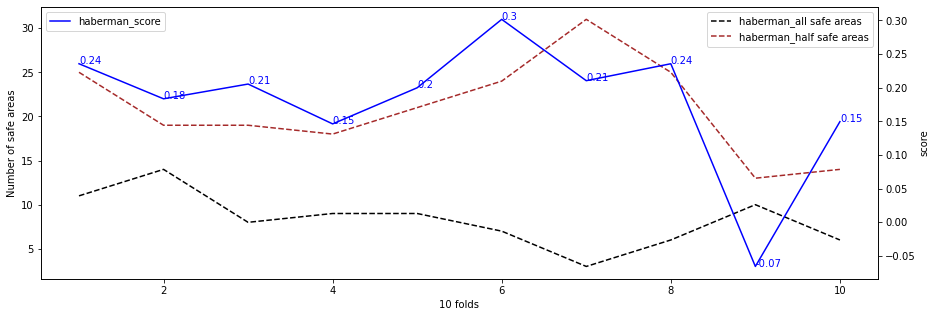

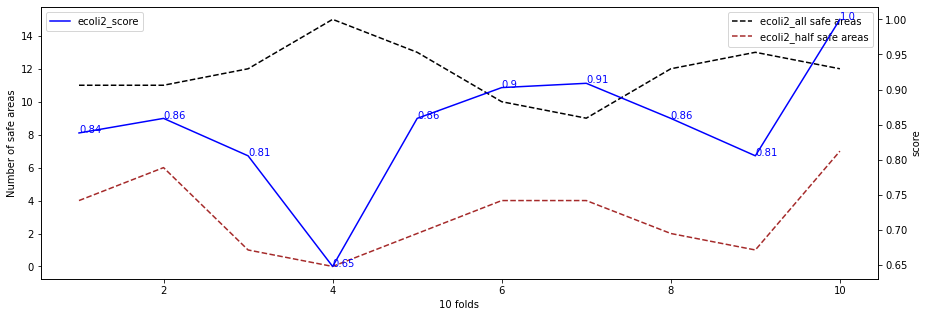

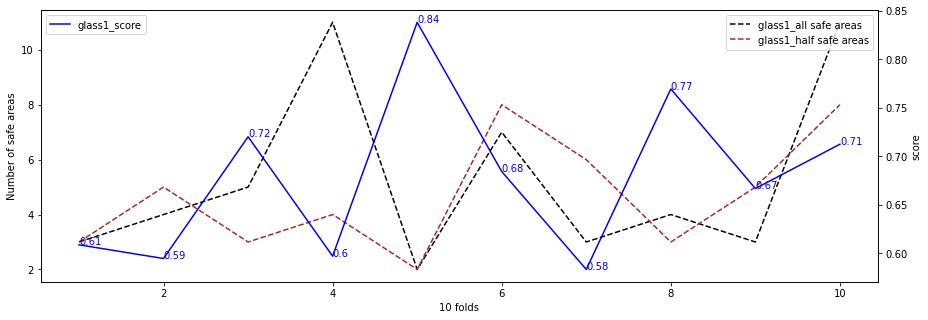

In [2]:
import COS_Funcs.visualize as V
file_name = 'baselines/c10_alpha0.5_N30_kappa_random_forest_k10.xlsx'
V.show_baselines_areas(file_name)